### LSTM

##Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('BTC.csv')
training_set = dataset_train.iloc[:3000, 4:5].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 90 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(90, 3000):
    X_train.append(training_set_scaled[i-90:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##Building and Training the LSTM

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the LSTM

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 80))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the LSTM

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the LSTM to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 14, batch_size = 32)

Epoch 1/14
91/91 [==============================] - 22s 169ms/step - loss: 0.0065
Epoch 2/14
91/91 [==============================] - 15s 166ms/step - loss: 0.0026
Epoch 3/14
91/91 [==============================] - 16s 174ms/step - loss: 0.0022
Epoch 4/14
91/91 [==============================] - 16s 179ms/step - loss: 0.0024
Epoch 5/14
91/91 [==============================] - 15s 167ms/step - loss: 0.0018
Epoch 6/14
91/91 [==============================] - 16s 173ms/step - loss: 0.0015
Epoch 7/14
91/91 [==============================] - 15s 167ms/step - loss: 0.0016
Epoch 8/14
91/91 [==============================] - 15s 167ms/step - loss: 0.0017
Epoch 9/14
91/91 [==============================] - 15s 168ms/step - loss: 0.0014
Epoch 10/14
91/91 [==============================] - 16s 176ms/step - loss: 0.0013
Epoch 11/14
91/91 [==============================] - 16s 171ms/step - loss: 0.0011
Epoch 12/14
91/91 [==============================] - 15s 168ms/step - loss: 0.0012
Epoch 13/14
9

In [ ]:
regressor.save('trained_lstm.h5')

##Making the predictions and visualising the results

### **Price Prediction**


In [ ]:
#real_stock_price = dataset_train.iloc[3001:, 1:2].values
real_stock_price = dataset_train.iloc[3001:, 4:5].values

### Getting the predicted price

In [ ]:
dataset_total = dataset_train['Close']
inputs = dataset_total[len(dataset_total) - len(real_stock_price) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(90, len(inputs)):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 [==============================] - 1s 45ms/step


In [ ]:
real_stock_price

array([[16974.826172],
       [17089.503906],
       [16848.126953],
       [17233.474609],
       [17133.152344],
       [17128.724609],
       [17104.193359],
       [17206.4375  ],
       [17781.318359],
       [17815.650391],
       [17364.865234],
       [16647.484375],
       [16795.091797],
       [16757.976563],
       [16439.679688],
       [16906.304688],
       [16817.535156],
       [16830.341797],
       [16796.953125],
       [16847.755859],
       [16841.986328],
       [16919.804688],
       [16717.173828],
       [16552.572266],
       [16642.341797],
       [16602.585938],
       [16547.496094],
       [16625.080078],
       [16688.470703],
       [16679.857422],
       [16863.238281],
       [16836.736328],
       [16951.96875 ],
       [16955.078125],
       [17091.144531],
       [17196.554688],
       [17446.292969],
       [17934.896484],
       [18869.587891],
       [19909.574219],
       [20976.298828],
       [20880.798828],
       [21169.632813],
       [211

In [ ]:
predicted_stock_price

array([[16470.621],
       [16565.828],
       [16639.604],
       [16679.623],
       [16697.34 ],
       [16702.742],
       [16702.695],
       [16700.232],
       [16700.824],
       [16730.629],
       [16804.223],
       [16899.34 ],
       [16959.656],
       [16955.795],
       [16885.922],
       [16755.752],
       [16603.729],
       [16464.434],
       [16360.981],
       [16301.414],
       [16284.831],
       [16302.728],
       [16345.858],
       [16395.172],
       [16428.484],
       [16437.44 ],
       [16422.084],
       [16386.44 ],
       [16341.203],
       [16299.504],
       [16269.903],
       [16262.728],
       [16279.742],
       [16320.153],
       [16377.65 ],
       [16447.818],
       [16527.781],
       [16621.291],
       [16745.303],
       [16939.799],
       [17255.266],
       [17734.12 ],
       [18347.4  ],
       [19026.98 ],
       [19684.379],
       [20219.508],
       [20587.955],
       [20855.014],
       [21086.338],
       [21310.895],


### Visualising the results

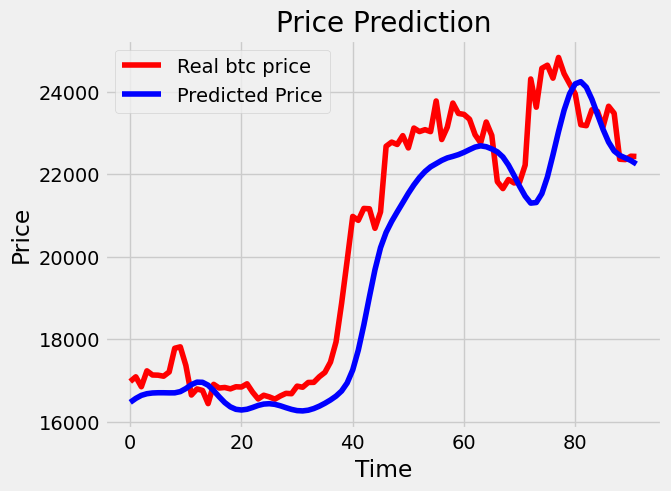

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(real_stock_price, color = 'red', label = 'Real btc price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(real_stock_price,predicted_stock_price)

0.8390817532278534

### Trying for a generalised value

In [ ]:
date='2018-04-18'
locate=int(np.where(dataset_train["Date"]==date)[0])
print(locate)

1309


In [ ]:
#l=dataset_train.iloc[locate-90:locate,1:2].values
l=dataset_train.iloc[locate-90:locate, 4:5].values
l=sc.transform(l)
print(l)

[[0.16763631]
 [0.16960252]
 [0.18877189]
 [0.16949418]
 [0.15957117]
 [0.15863629]
 [0.16592238]
 [0.16443845]
 [0.16313259]
 [0.16712881]
 [0.17225725]
 [0.1649875 ]
 [0.14732727]
 [0.14903081]
 [0.13344127]
 [0.12839903]
 [0.13350612]
 [0.12018193]
 [0.10056826]
 [0.11242084]
 [0.11045166]
 [0.12001246]
 [0.12700756]
 [0.12529985]
 [0.11799997]
 [0.12982094]
 [0.12494978]
 [0.13825053]
 [0.14821912]
 [0.14922077]
 [0.16226152]
 [0.15393817]
 [0.16393242]
 [0.16657975]
 [0.1559949 ]
 [0.14582405]
 [0.15021796]
 [0.14297595]
 [0.1407747 ]
 [0.15119142]
 [0.15651723]
 [0.15165441]
 [0.15986201]
 [0.16187125]
 [0.16785593]
 [0.16819574]
 [0.16909649]
 [0.15732301]
 [0.14523894]
 [0.13677224]
 [0.13591957]
 [0.12892212]
 [0.13949703]
 [0.13395441]
 [0.13380201]
 [0.12007508]
 [0.12053585]
 [0.12109216]
 [0.11483786]
 [0.11939055]
 [0.1254297 ]
 [0.12962653]
 [0.12986115]
 [0.12688127]
 [0.12912423]
 [0.12598572]
 [0.12342832]
 [0.11917865]
 [0.11359374]
 [0.11539582]
 [0.10369089]
 [0.09

In [ ]:
l=l.flatten()

In [ ]:
l=l.reshape((1,90,1))

In [ ]:
predict=regressor.predict([l])

1/1 [==============================] - 1s 1s/step


In [ ]:
print(sc.inverse_transform(predict))

[[7775.604]]


In [ ]:
#dataset_train.loc[locate+1]['Open']

dataset_train.loc[locate+1]['Close']

8294.30957

In [ ]:
from keras.models import load_model

model = load_model('trained_lstm.h5')
predicted = model.predict([l])

1/1 [==============================] - 1s 1s/step


In [ ]:
print(sc.inverse_transform(predicted))

[[7775.604]]


In [ ]:
from keras.models import load_model

model = load_model('trained_lstm.h5')

dataset_total = dataset_train['Close']
inputs = dataset_total[len(dataset_total) - len(real_stock_price) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(90, len(inputs)):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 [==============================] - 1s 40ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))
print("Test MAPE: %.3f" % mean_absolute_percentage_error(real_stock_price, predicted_stock_price))

Test RMSE: 1208.610
Test MAPE: 0.042


In [ ]:
from sklearn.metrics import r2_score
r2_score(real_stock_price,predicted_stock_price)

0.8390817532278534